Through this machine learning algoritham it helps the banking sector to give loan to a speacific member.It will help to create  most probabile assumption whether the person will repay the amound or not

## Step 1: Data understanding and cleaning

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 2890-EBDB

 Directory of C:\Users\Gowtham krishnan\project

21-02-2022  17:57    <DIR>          .
18-02-2022  21:07    <DIR>          ..
11-02-2022  13:05    <DIR>          .ipynb_checkpoints
27-07-2018  07:21            38,013 data.csv
21-02-2022  17:57         3,216,554 loan prediction analysis.ipynb
19-02-2022  14:45            53,802 Untitled.ipynb
               3 File(s)      3,308,369 bytes
               3 Dir(s)  161,703,047,168 bytes free


In [3]:
df=pd.read_csv('data.csv')

In [4]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


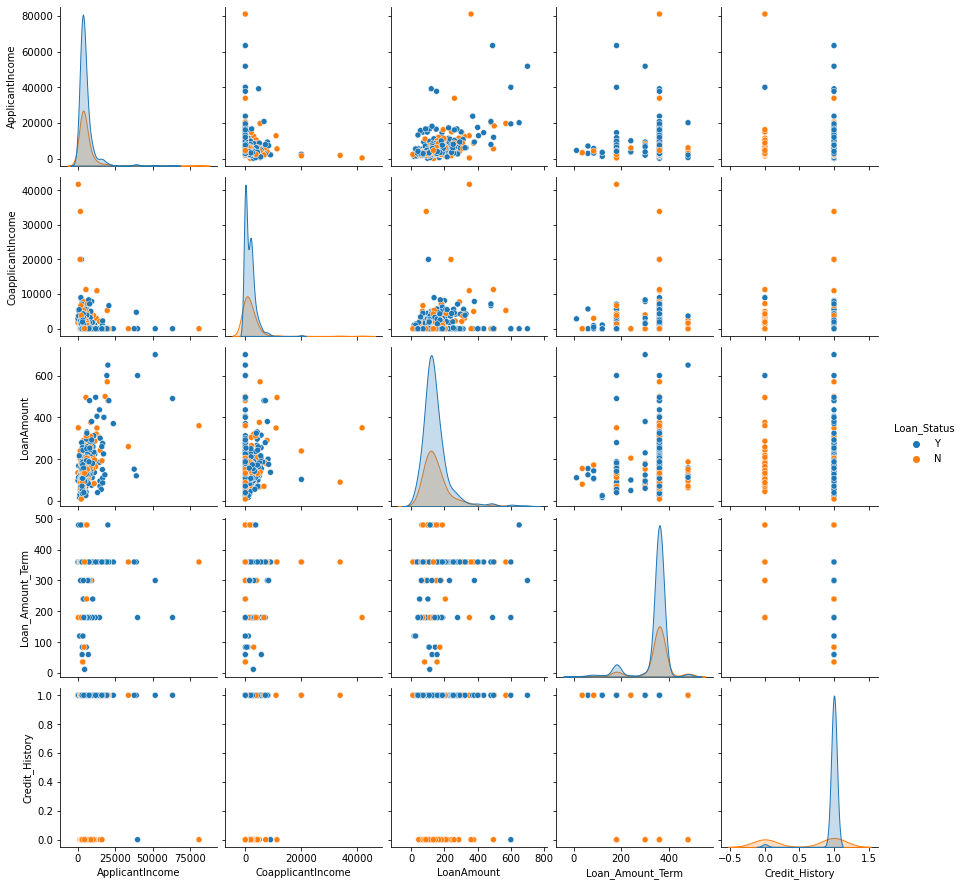

In [5]:
sns.pairplot(data=df,hue='Loan_Status')

In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
pd.set_option('display.max_rows',None)

In [9]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.000000,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.000000,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.000000,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.000000,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.000000,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.000000,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.000000,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.000000,349.0,360.0,1.0,Semiurban,N


In [10]:
df['Gender'].value_counts(normalize=True)

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64

In [11]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [12]:
df.Gender.isnull().sum()

13

In [13]:
df['Gender']=df["Gender"].replace(np.NaN,'Male')

In [14]:
df.Gender.isnull().sum()

0

In [15]:
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

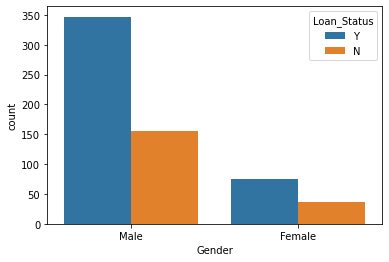

In [16]:
sns.countplot(x=df["Gender"],hue=df['Loan_Status'])

In [17]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [18]:
df.Married.isnull().sum()

3

In [19]:
df['Married']=df["Married"].replace(np.NaN,'Yes')

<AxesSubplot:xlabel='Married', ylabel='count'>

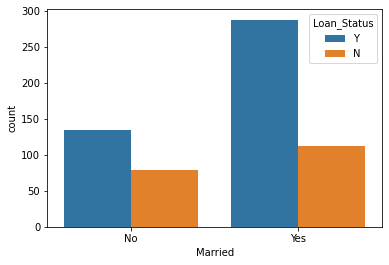

In [20]:
sns.countplot(x=df["Married"],hue=df['Loan_Status'])

In [21]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [22]:
df['Dependents']=df['Dependents'].bfill()

<AxesSubplot:xlabel='Dependents', ylabel='count'>

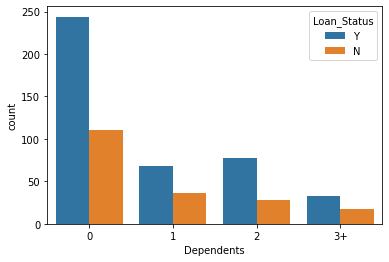

In [23]:
sns.countplot(x=df["Dependents"],hue=df['Loan_Status'])

In [24]:
df.Dependents.isnull().sum()

0

In [25]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

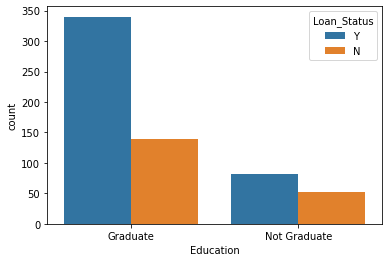

In [26]:
sns.countplot(x=df["Education"],hue=df['Loan_Status'])

In [27]:
df.Education.isnull().sum()

0

In [28]:
df.Self_Employed.isnull().sum()

32

In [29]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

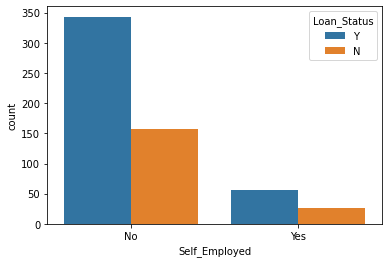

In [30]:
sns.countplot(x=df["Self_Employed"],hue=df['Loan_Status'])

In [31]:
df['Self_Employed']=df['Self_Employed'].bfill()

In [32]:
df['Self_Employed'].value_counts()

No     528
Yes     86
Name: Self_Employed, dtype: int64

In [33]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

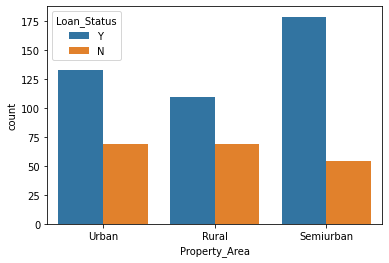

In [34]:
sns.countplot(x=df["Property_Area"],hue=df['Loan_Status'])

In [35]:
df.Property_Area.isnull().sum()

0

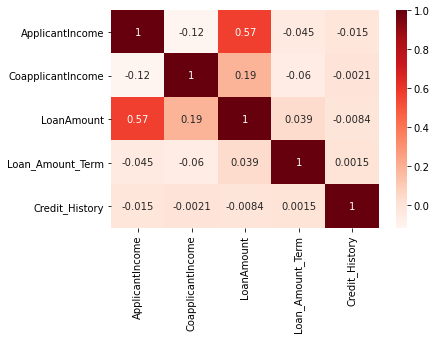

In [36]:
sns.heatmap(df.corr(), cmap="Reds", annot=True)
plt.show()

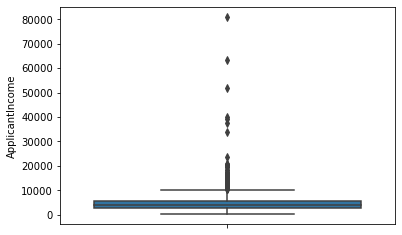

In [37]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df['ApplicantIncome'])
plt.show()

In [38]:
df['ApplicantIncome'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
5%        1897.550000
25%       2877.500000
50%       3812.500000
75%       5795.000000
90%       9459.900000
95%      14583.000000
99%      32540.410000
max      81000.000000
Name: ApplicantIncome, dtype: float64

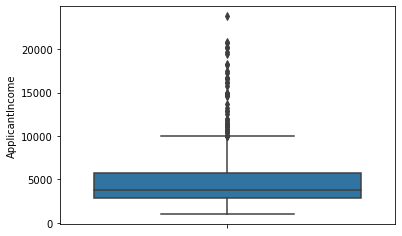

In [39]:
Q3 = df.ApplicantIncome.quantile(0.99)
df = df[(df.ApplicantIncome <= Q3)]
Q1 = df.ApplicantIncome.quantile(0.01)
df = df[(df.ApplicantIncome >= Q1)]
sns.boxplot(y=df['ApplicantIncome'])
plt.show()

In [40]:
df.shape

(601, 13)

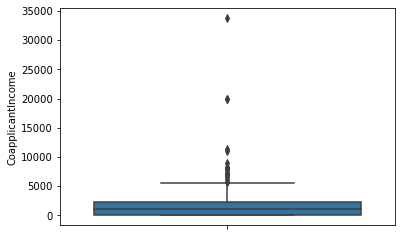

In [41]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df['CoapplicantIncome'])
plt.show()

In [42]:
df['CoapplicantIncome'].describe(percentiles=[0.05,.25,.26, .5, .75, .90, .95, .99])

count      601.000000
mean      1551.264426
std       2447.952413
min          0.000000
5%           0.000000
25%          0.000000
26%          0.000000
50%       1167.000000
75%       2254.000000
90%       3750.000000
95%       4983.000000
99%       8333.000000
max      33837.000000
Name: CoapplicantIncome, dtype: float64

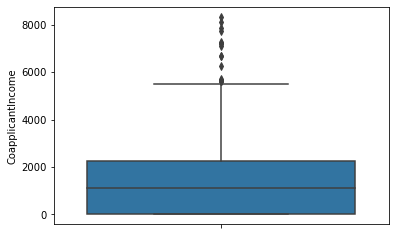

In [43]:
Q3 = df.CoapplicantIncome.quantile(0.99)
df = df[(df.CoapplicantIncome <= Q3)]
Q1 = df.CoapplicantIncome.quantile(0.01)
df = df[(df.CoapplicantIncome >= Q1)]
sns.boxplot(y=df['CoapplicantIncome'])
plt.show()

In [44]:
df.shape

(595, 13)

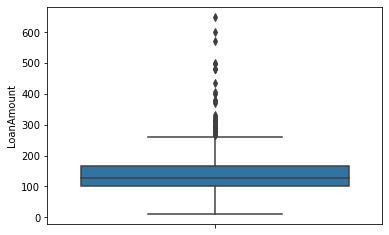

In [45]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df['LoanAmount'])
plt.show()

In [46]:
df['LoanAmount'].describe(percentiles=[0.01,0.05,.25,.26, .5, .75, .90, .95, .99])

count    573.000000
mean     142.420593
std       77.182008
min        9.000000
1%        30.000000
5%        55.600000
25%      100.000000
26%      100.000000
50%      127.000000
75%      165.000000
90%      217.600000
95%      276.600000
99%      480.000000
max      650.000000
Name: LoanAmount, dtype: float64

In [47]:
df["LoanAmount"].isnull().sum()

22

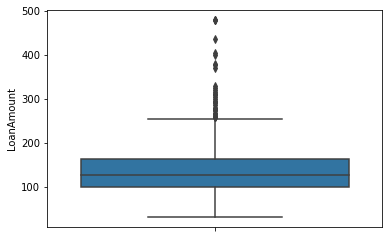

In [48]:
Q3 = df['LoanAmount'].quantile(0.99)
df = df[(df['LoanAmount'] <= Q3)]
Q1 = df['LoanAmount'].quantile(0.01)
df = df[(df['LoanAmount'] >= Q1)]
sns.boxplot(y=df['LoanAmount'])
plt.show()

In [49]:
df["LoanAmount"]=df['LoanAmount'].bfill()

In [50]:
df["LoanAmount"]

1      128.0
2       66.0
3      120.0
4      141.0
5      267.0
6       95.0
7      158.0
8      168.0
10      70.0
11     109.0
12     200.0
13     114.0
15     125.0
16     100.0
17      76.0
18     133.0
19     115.0
20     104.0
21     315.0
22     116.0
23     112.0
24     151.0
25     191.0
26     122.0
27     110.0
28      35.0
29     120.0
30     201.0
31      74.0
32     106.0
33     114.0
34     320.0
36     100.0
37     144.0
38     184.0
39     110.0
40      80.0
41      47.0
42      75.0
43     134.0
44      96.0
45      88.0
46      44.0
47     144.0
48     120.0
49     144.0
50     100.0
51     120.0
52     112.0
53     134.0
54     286.0
55      97.0
56      96.0
57     135.0
58     180.0
59     144.0
60     120.0
61      99.0
62     165.0
64     116.0
65     258.0
66     126.0
67     312.0
68     125.0
69     136.0
70     172.0
71      97.0
72      81.0
73      95.0
74     187.0
75     113.0
76     176.0
78     180.0
79     130.0
80     111.0
82     167.0
83     265.0

In [51]:
df["LoanAmount"].isnull().sum()

0

In [52]:
df.shape

(563, 13)

In [53]:
df["Loan_Amount_Term"].value_counts()

360.0    473
180.0     39
480.0     13
300.0     12
84.0       4
240.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [54]:
df['Loan_Amount_Term'].describe(percentiles=[0.05,.25,.26, .5, .75, .90, .95, .99])

count    549.000000
mean     343.169399
std       63.324060
min       12.000000
5%       180.000000
25%      360.000000
26%      360.000000
50%      360.000000
75%      360.000000
90%      360.000000
95%      360.000000
99%      480.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64

In [55]:
df.shape

(563, 13)

In [56]:
df["Loan_Amount_Term"]=df['Loan_Amount_Term'].bfill()

In [57]:
df['Loan_Amount_Term'].isnull().sum()

0

In [58]:
df['Loan_Amount_Term'].isnull().sum()

0

In [59]:
df.shape

(563, 13)

In [60]:
df['Credit_History']=df['Credit_History'].bfill()

In [61]:
df['Credit_History'].isnull().sum()

0

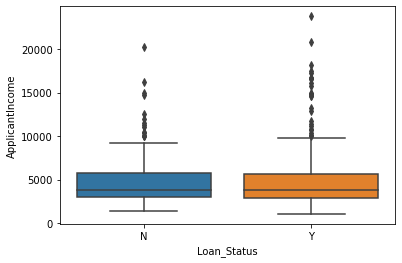

In [62]:
sns.boxplot(y = 'ApplicantIncome', x = 'Loan_Status', data = df)
plt.show()

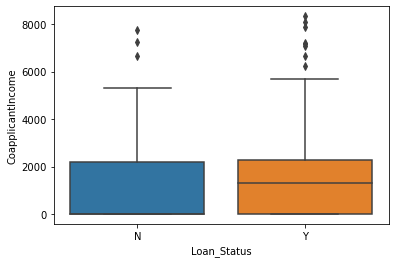

In [63]:
sns.boxplot(y = 'CoapplicantIncome', x = 'Loan_Status', data = df)
plt.show()

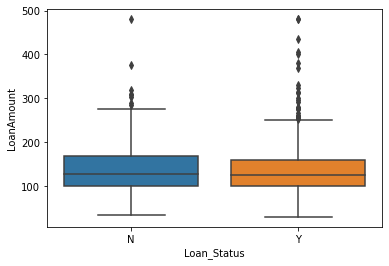

In [64]:
sns.boxplot(y ='LoanAmount',x='Loan_Status', data = df)
plt.show()

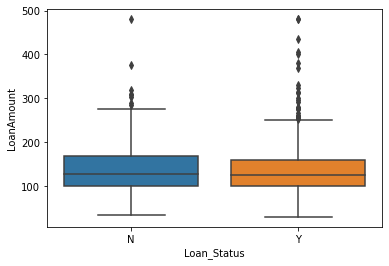

In [65]:
sns.boxplot(y = 'LoanAmount', x = 'Loan_Status', data = df)
plt.show()

In [66]:
#sns.boxplot(y = 'Loan_Amount_Term', x = 'Loan_Status', data = df)
#plt.show()

In [67]:
df['LoanAmount'].value_counts(normalize=True)

120.0    0.033748
110.0    0.028419
100.0    0.026643
187.0    0.021314
160.0    0.021314
128.0    0.019538
130.0    0.017762
113.0    0.017762
96.0     0.015986
95.0     0.015986
115.0    0.014210
112.0    0.014210
70.0     0.014210
132.0    0.012433
136.0    0.012433
150.0    0.012433
104.0    0.012433
125.0    0.012433
116.0    0.010657
80.0     0.010657
175.0    0.010657
135.0    0.010657
158.0    0.010657
155.0    0.010657
138.0    0.010657
144.0    0.010657
180.0    0.010657
81.0     0.010657
185.0    0.008881
111.0    0.008881
108.0    0.008881
71.0     0.008881
133.0    0.008881
140.0    0.008881
200.0    0.008881
124.0    0.008881
90.0     0.008881
182.0    0.007105
88.0     0.007105
151.0    0.007105
50.0     0.007105
55.0     0.007105
60.0     0.007105
123.0    0.007105
126.0    0.007105
94.0     0.007105
84.0     0.007105
172.0    0.007105
66.0     0.007105
122.0    0.007105
152.0    0.007105
134.0    0.007105
99.0     0.007105
105.0    0.007105
131.0    0.007105
107.0    0

In [68]:
round(100*(df.isnull().sum()/len(df.index)),2)

Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

## Step2: Data Preparation

### Dummy Creation

In [69]:
cat_cols= df.select_dtypes(include=['object']).columns
cat_cols

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [70]:
varlist=["Loan_Status"]
def binary_map(x):
    return x.map({'Y': 1, "N": 0})
df[varlist]=df[varlist].apply(binary_map)

In [71]:
df[varlist].value_counts()

Loan_Status
1              394
0              169
dtype: int64

In [72]:
df['Gender'].value_counts()

Male      461
Female    102
Name: Gender, dtype: int64

In [73]:
sex=["Gender"]
def binary_map(x):
    return x.map({'Male': 1, "Female": 0})
df[sex]=df[sex].apply(binary_map)

In [74]:
df[sex].value_counts()

Gender
1         461
0         102
dtype: int64

In [75]:
df['Married'].value_counts()

Yes    366
No     197
Name: Married, dtype: int64

In [76]:
marrage=["Married"]
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})
df[marrage]=df[marrage].apply(binary_map)

In [77]:
df['Dependents'].value_counts()

0     328
2      99
1      92
3+     44
Name: Dependents, dtype: int64

In [78]:
df['Dependents']=df["Dependents"].replace("3+","3")

In [79]:
df['Dependents'].value_counts()

0    328
2     99
1     92
3     44
Name: Dependents, dtype: int64

In [80]:
df['Education'].value_counts()

Graduate        438
Not Graduate    125
Name: Education, dtype: int64

In [81]:
dummy = pd.get_dummies(df[["Education"]], prefix="Education")

df = pd.concat([df,dummy],1)

In [82]:
dummy

,Education_Graduate,Education_Not Graduate
1,1,0
2,1,0
3,0,1
4,1,0
5,1,0
6,0,1
7,1,0
8,1,0
10,1,0
11,1,0


In [83]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Education_Graduate,Education_Not Graduate
1,LP001003,1,1,1,Graduate,No,4583,1508.000000,128.0,360.0,1.0,Rural,0,1,0
2,LP001005,1,1,0,Graduate,Yes,3000,0.000000,66.0,360.0,1.0,Urban,1,1,0
3,LP001006,1,1,0,Not Graduate,No,2583,2358.000000,120.0,360.0,1.0,Urban,1,0,1
4,LP001008,1,0,0,Graduate,No,6000,0.000000,141.0,360.0,1.0,Urban,1,1,0
5,LP001011,1,1,2,Graduate,Yes,5417,4196.000000,267.0,360.0,1.0,Urban,1,1,0
6,LP001013,1,1,0,Not Graduate,No,2333,1516.000000,95.0,360.0,1.0,Urban,1,0,1
7,LP001014,1,1,3,Graduate,No,3036,2504.000000,158.0,360.0,0.0,Semiurban,0,1,0
8,LP001018,1,1,2,Graduate,No,4006,1526.000000,168.0,360.0,1.0,Urban,1,1,0
10,LP001024,1,1,2,Graduate,No,3200,700.000000,70.0,360.0,1.0,Urban,1,1,0
11,LP001027,1,1,2,Graduate,No,2500,1840.000000,109.0,360.0,1.0,Urban,1,1,0


In [84]:
df['Self_Employed'].value_counts()

No     488
Yes     75
Name: Self_Employed, dtype: int64

In [85]:
employ=["Self_Employed"]
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})
df[employ]=df[employ].apply(binary_map)

In [86]:
df[employ]

,Self_Employed
1,0
2,1
3,0
4,0
5,1
6,0
7,0
8,0
10,0
11,0


In [87]:
df['Property_Area'].value_counts()

Semiurban    214
Urban        181
Rural        168
Name: Property_Area, dtype: int64

In [88]:
dummy = pd.get_dummies(df[["Property_Area"]], prefix="Property_Area")

df = pd.concat([df,dummy],1)

In [89]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,LP001003,1,1,1,Graduate,0,4583,1508.000000,128.0,360.0,1.0,Rural,0,1,0,1,0,0
2,LP001005,1,1,0,Graduate,1,3000,0.000000,66.0,360.0,1.0,Urban,1,1,0,0,0,1
3,LP001006,1,1,0,Not Graduate,0,2583,2358.000000,120.0,360.0,1.0,Urban,1,0,1,0,0,1
4,LP001008,1,0,0,Graduate,0,6000,0.000000,141.0,360.0,1.0,Urban,1,1,0,0,0,1
5,LP001011,1,1,2,Graduate,1,5417,4196.000000,267.0,360.0,1.0,Urban,1,1,0,0,0,1
6,LP001013,1,1,0,Not Graduate,0,2333,1516.000000,95.0,360.0,1.0,Urban,1,0,1,0,0,1
7,LP001014,1,1,3,Graduate,0,3036,2504.000000,158.0,360.0,0.0,Semiurban,0,1,0,0,1,0
8,LP001018,1,1,2,Graduate,0,4006,1526.000000,168.0,360.0,1.0,Urban,1,1,0,0,0,1
10,LP001024,1,1,2,Graduate,0,3200,700.000000,70.0,360.0,1.0,Urban,1,1,0,0,0,1
11,LP001027,1,1,2,Graduate,0,2500,1840.000000,109.0,360.0,1.0,Urban,1,1,0,0,0,1


In [90]:
delco=["Loan_ID","Education","Property_Area"]

In [91]:
df=df.drop(delco,1)

In [92]:
df

,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1,1,1,0,4583,1508.000000,128.0,360.0,1.0,0,1,0,1,0,0
2,1,1,0,1,3000,0.000000,66.0,360.0,1.0,1,1,0,0,0,1
3,1,1,0,0,2583,2358.000000,120.0,360.0,1.0,1,0,1,0,0,1
4,1,0,0,0,6000,0.000000,141.0,360.0,1.0,1,1,0,0,0,1
5,1,1,2,1,5417,4196.000000,267.0,360.0,1.0,1,1,0,0,0,1
6,1,1,0,0,2333,1516.000000,95.0,360.0,1.0,1,0,1,0,0,1
7,1,1,3,0,3036,2504.000000,158.0,360.0,0.0,0,1,0,0,1,0
8,1,1,2,0,4006,1526.000000,168.0,360.0,1.0,1,1,0,0,0,1
10,1,1,2,0,3200,700.000000,70.0,360.0,1.0,1,1,0,0,0,1
11,1,1,2,0,2500,1840.000000,109.0,360.0,1.0,1,1,0,0,0,1


## Train-Test Split :

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
df['Dependents']=pd.to_numeric(df['Dependents'])

In [95]:
y=df["Loan_Status"]

In [96]:
y

1      0
2      1
3      1
4      1
5      1
6      1
7      0
8      1
10     1
11     1
12     1
13     0
15     1
16     1
17     0
18     0
19     1
20     0
21     1
22     0
23     0
24     0
25     1
26     1
27     1
28     0
29     1
30     0
31     0
32     0
33     1
34     0
36     0
37     1
38     1
39     1
40     0
41     1
42     1
43     1
44     1
45     1
46     1
47     1
48     0
49     1
50     1
51     1
52     0
53     0
54     0
55     1
56     1
57     0
58     1
59     1
60     1
61     1
62     0
64     0
65     0
66     0
67     1
68     1
69     0
70     1
71     1
72     1
73     0
74     1
75     0
76     0
78     0
79     1
80     1
82     0
83     0
84     1
85     1
86     1
87     1
88     1
89     1
90     1
91     1
92     1
93     1
96     1
97     1
98     1
99     1
100    1
101    1
104    1
105    1
106    1
107    0
108    0
109    1
110    1
111    1
112    0
114    1
115    1
116    1
117    1
118    0
119    1
120    1
121    1
123    1
1

In [97]:
X=df.drop(["Loan_Status"],1)

In [98]:
X

,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1,1,1,0,4583,1508.000000,128.0,360.0,1.0,1,0,1,0,0
2,1,1,0,1,3000,0.000000,66.0,360.0,1.0,1,0,0,0,1
3,1,1,0,0,2583,2358.000000,120.0,360.0,1.0,0,1,0,0,1
4,1,0,0,0,6000,0.000000,141.0,360.0,1.0,1,0,0,0,1
5,1,1,2,1,5417,4196.000000,267.0,360.0,1.0,1,0,0,0,1
6,1,1,0,0,2333,1516.000000,95.0,360.0,1.0,0,1,0,0,1
7,1,1,3,0,3036,2504.000000,158.0,360.0,0.0,1,0,0,1,0
8,1,1,2,0,4006,1526.000000,168.0,360.0,1.0,1,0,0,0,1
10,1,1,2,0,3200,700.000000,70.0,360.0,1.0,1,0,0,0,1
11,1,1,2,0,2500,1840.000000,109.0,360.0,1.0,1,0,0,0,1


In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [100]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 66 to 566
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   394 non-null    int64  
 1   Married                  394 non-null    int64  
 2   Dependents               394 non-null    int64  
 3   Self_Employed            394 non-null    int64  
 4   ApplicantIncome          394 non-null    int64  
 5   CoapplicantIncome        394 non-null    float64
 6   LoanAmount               394 non-null    float64
 7   Loan_Amount_Term         394 non-null    float64
 8   Credit_History           394 non-null    float64
 9   Education_Graduate       394 non-null    uint8  
 10  Education_Not Graduate   394 non-null    uint8  
 11  Property_Area_Rural      394 non-null    uint8  
 12  Property_Area_Semiurban  394 non-null    uint8  
 13  Property_Area_Urban      394 non-null    uint8  
dtypes: float64(4), int64(5), 

In [101]:
df['Dependents'].value_counts()

0    328
2     99
1     92
3     44
Name: Dependents, dtype: int64

## Feature Scaling:

In [102]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

<ipython-input-102-bb0980b2fc07>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
C:\Users\Gowtham krishnan\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
66,0.492851,-1.377338,-0.772402,-0.372463,-0.502098,0.484658,-0.196383,-2.627657,-2.270738,0,1,0,0,1
212,0.492851,0.726038,0.222129,2.684834,0.883060,-0.816073,1.536568,0.271793,0.440386,1,0,0,0,1
436,0.492851,-1.377338,-0.772402,-0.372463,-0.886814,0.252096,-1.351683,0.271793,0.440386,1,0,0,1,0
316,0.492851,0.726038,1.216660,-0.372463,-0.345977,-0.816073,-0.287591,0.271793,0.440386,1,0,0,1,0
532,0.492851,-1.377338,1.216660,-0.372463,-0.384932,-0.816073,-0.439604,0.271793,-2.270738,1,0,1,0,0


In [103]:
X_train.head()

,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
66,0.492851,-1.377338,-0.772402,-0.372463,-0.502098,0.484658,-0.196383,-2.627657,-2.270738,0,1,0,0,1
212,0.492851,0.726038,0.222129,2.684834,0.883060,-0.816073,1.536568,0.271793,0.440386,1,0,0,0,1
436,0.492851,-1.377338,-0.772402,-0.372463,-0.886814,0.252096,-1.351683,0.271793,0.440386,1,0,0,1,0
316,0.492851,0.726038,1.216660,-0.372463,-0.345977,-0.816073,-0.287591,0.271793,0.440386,1,0,0,1,0
532,0.492851,-1.377338,1.216660,-0.372463,-0.384932,-0.816073,-0.439604,0.271793,-2.270738,1,0,1,0,0


## Step3: Logistic Regression Model Building 

In [104]:
import statsmodels.api as sm

In [105]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

C:\Users\Gowtham krishnan\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [106]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [107]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Gender', True, 1),
 ('Married', True, 1),
 ('Dependents', True, 1),
 ('Self_Employed', True, 1),
 ('ApplicantIncome', True, 1),
 ('CoapplicantIncome', True, 1),
 ('LoanAmount', True, 1),
 ('Loan_Amount_Term', True, 1),
 ('Credit_History', True, 1),
 ('Education_Graduate', True, 1),
 ('Education_Not Graduate', True, 1),
 ('Property_Area_Rural', True, 1),
 ('Property_Area_Semiurban', True, 1),
 ('Property_Area_Urban', True, 1)]

In [108]:
col = X_train.columns[rfe.support_]
col

Index(['Gender', 'Married', 'Dependents', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Education_Graduate', 'Education_Not Graduate', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [109]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Gender', True, 1),
 ('Married', True, 1),
 ('Dependents', True, 1),
 ('Self_Employed', True, 1),
 ('ApplicantIncome', True, 1),
 ('CoapplicantIncome', True, 1),
 ('LoanAmount', True, 1),
 ('Loan_Amount_Term', True, 1),
 ('Credit_History', True, 1),
 ('Education_Graduate', True, 1),
 ('Education_Not Graduate', True, 1),
 ('Property_Area_Rural', True, 1),
 ('Property_Area_Semiurban', True, 1),
 ('Property_Area_Urban', True, 1)]

In [110]:
X_train.columns[~rfe.support_]

Index([], dtype='object')

In [111]:
col = X_train.columns[rfe.support_]
col

Index(['Gender', 'Married', 'Dependents', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Education_Graduate', 'Education_Not Graduate', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [112]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            Loan_Status   No. Observations:                  394
Model:                            GLM   Df Residuals:                      381
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -176.15
Date:                Mon, 21 Feb 2022   Deviance:                       352.31
Time:                        17:58:59   Pearson chi2:                     390.
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.4321      0.086      5.012      0.000       0.263       0.601
Gender                      0.0171      0.149      0.115      0.909      -0.275       0.309
Married                     0.2119      0.160      1.325      0.185      -0.102       0.526
Dependents                  0.1881      0.159      1.184      0.236      -0.123       0.500
Self_Employed              -0.1637      0.134     -1.220      0.223      -0.427       0.099
ApplicantIncome             0.2414      0.195      1.241      0.215      -0.140       0.623
CoapplicantIncome           0.0733      0.166      0.441      0.659      -0.252       0.399
LoanAmount                 -0.3708      0.193     -1.918      0.055      -0.750       0.008
Loan_Amount_Term           -0.1681      0.163     -1.033      0.302      -0.487       0.151
Credit_History              1.3016      0.155      8.395      0.000       0.998       1.606
Education_Graduate          0.4159      0.146      2.843      0.004       0.129       0.703
Education_Not Graduate      0.0162      0.187      0.086      0.931      -0.351       0.383
Property_Area_Rural        -0.2159      0.194     -1.116      0.265      -0.595       0.163
Property_Area_Semiurban     0.6294      0.195      3.227      0.001       0.247       1.012
Property_Area_Urban         0.0186      0.203      0.092      0.927      -0.379       0.416
===========================================================================================
"""

In [113]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [114]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\Users\Gowtham krishnan\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
9,Education_Graduate,inf
10,Education_Not Graduate,inf
11,Property_Area_Rural,inf
12,Property_Area_Semiurban,inf
13,Property_Area_Urban,inf
6,LoanAmount,2.00
4,ApplicantIncome,1.84
5,CoapplicantIncome,1.51
1,Married,1.44
0,Gender,1.26


In [115]:
col = col.drop('Education_Graduate',1)

In [116]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            Loan_Status   No. Observations:                  394
Model:                            GLM   Df Residuals:                      381
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -176.15
Date:                Mon, 21 Feb 2022   Deviance:                       352.31
Time:                        17:58:59   Pearson chi2:                     390.
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.7440      0.121      6.136      0.000       0.506       0.982
Gender                      0.0171      0.149      0.115      0.908      -0.274       0.308
Married                     0.2120      0.160      1.327      0.184      -0.101       0.525
Dependents                  0.1881      0.159      1.187      0.235      -0.123       0.499
Self_Employed              -0.1637      0.134     -1.222      0.222      -0.426       0.099
ApplicantIncome             0.2415      0.193      1.249      0.212      -0.137       0.620
CoapplicantIncome           0.0733      0.166      0.442      0.658      -0.252       0.398
LoanAmount                 -0.3709      0.193     -1.925      0.054      -0.748       0.007
Loan_Amount_Term           -0.1681      0.162     -1.035      0.301      -0.486       0.150
Credit_History              1.3017      0.156      8.365      0.000       0.997       1.607
Education_Not Graduate     -0.3998      0.324     -1.232      0.218      -1.036       0.236
Property_Area_Rural        -0.1119      0.199     -0.563      0.573      -0.501       0.278
Property_Area_Semiurban     0.7334      0.197      3.715      0.000       0.346       1.120
Property_Area_Urban         0.1226      0.200      0.613      0.540      -0.270       0.515
===========================================================================================
"""

In [117]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [118]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,LoanAmount,2.00
4,ApplicantIncome,1.84
5,CoapplicantIncome,1.51
1,Married,1.44
0,Gender,1.26
2,Dependents,1.24
10,Property_Area_Rural,1.16
11,Property_Area_Semiurban,1.15
3,Self_Employed,1.10
12,Property_Area_Urban,1.10


In [119]:
#col = col.drop('Property_Area_Semiurban',1)

In [120]:
# X_train_sm = sm.add_constant(X_train[col])
# logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
# res = logm2.fit()
# res.summary()

In [121]:
# vif = pd.DataFrame()
# vif['Features'] = X_train[col].columns
# vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
# vif['VIF'] = round(vif['VIF'], 2)
# vif = vif.sort_values(by = "VIF", ascending = False)
# vif

In [122]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

66     0.081054
212    0.677500
436    0.874655
316    0.918374
532    0.086844
508    0.643087
513    0.951745
355    0.862658
50     0.839597
54     0.056337
dtype: float64

In [123]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.08105443, 0.67749999, 0.87465529, 0.91837378, 0.08684364,
       0.64308661, 0.95174484, 0.86265761, 0.83959678, 0.05633731])

In [124]:
y_train_pred_final = pd.DataFrame({'Status':y_train.values, 'Status_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Status,Status_prob,Prospect ID
0,0,0.081054,66
1,1,0.677500,212
2,1,0.874655,436
3,1,0.918374,316
4,0,0.086844,532


In [125]:
y_train_pred_final['Predicted'] = y_train_pred_final.Status_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Status,Status_prob,Prospect ID,Predicted
0,0,0.081054,66,0
1,1,0.677500,212,1
2,1,0.874655,436,1
3,1,0.918374,316,1
4,0,0.086844,532,0


In [126]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Status, y_train_pred_final.Predicted )
print(confusion)

[[ 57  63]
 [ 10 264]]


In [127]:
print(metrics.accuracy_score(y_train_pred_final.Status, y_train_pred_final.Predicted))

0.8147208121827412


In [128]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [129]:
TP / float(TP+FN)

0.9635036496350365

In [130]:
TN / float(TN+FP)

0.475

In [131]:
print(FP/ float(TN+FP))

0.525


In [132]:
print (TP / float(TP+FP))

0.8073394495412844


In [133]:
print (TN / float(TN+ FN))

0.8507462686567164


## PLOTTING ROC CURVE

In [134]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [135]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Status, y_train_pred_final.Status_prob, drop_intermediate = False )

draw_roc(y_train_pred_final.Status, y_train_pred_final.Status_prob)

In [137]:
num_cols=X_test.select_dtypes(include=['float64','int64']).columns
num_cols

Index(['Gender', 'Married', 'Dependents', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History'],
      dtype='object')

## Finding Optimal Cutoff Point

In [138]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Status_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Status,Status_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.081054,66,0,1,0,0,0,0,0,0,0,0,0
1,1,0.677500,212,1,1,1,1,1,1,1,1,0,0,0
2,1,0.874655,436,1,1,1,1,1,1,1,1,1,1,0
3,1,0.918374,316,1,1,1,1,1,1,1,1,1,1,1
4,0,0.086844,532,0,1,0,0,0,0,0,0,0,0,0


In [139]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Status, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.695431  1.000000  0.000000
0.1   0.1  0.751269  0.992701  0.200000
0.2   0.2  0.799492  0.974453  0.400000
0.3   0.3  0.814721  0.970803  0.458333
0.4   0.4  0.817259  0.970803  0.466667
0.5   0.5  0.814721  0.963504  0.475000
0.6   0.6  0.819797  0.959854  0.500000
0.7   0.7  0.771574  0.850365  0.591667
0.8   0.8  0.675127  0.620438  0.800000
0.9   0.9  0.398477  0.145985  0.975000


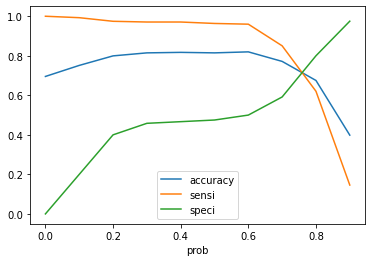

In [140]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [141]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Status_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Status,Status_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.081054,66,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.677500,212,1,1,1,1,1,1,1,1,0,0,0,1
2,1,0.874655,436,1,1,1,1,1,1,1,1,1,1,0,1
3,1,0.918374,316,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.086844,532,0,1,0,0,0,0,0,0,0,0,0,0


In [142]:
metrics.accuracy_score(y_train_pred_final.Status, y_train_pred_final.final_Predicted)

0.8147208121827412

In [143]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Status, y_train_pred_final.final_Predicted )
confusion2

array([[ 55,  65],
       [  8, 266]], dtype=int64)

In [144]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [145]:
TP / float(TP+FN)

0.9708029197080292

In [146]:
TN / float(TN+FP)

0.4583333333333333

### Result of model evaluation on Train data

Accuracy:81.4%

sensitivity: 97.0%

specificity: 45.833%

In [147]:
print(FP/ float(TN+FP))

0.5416666666666666


In [148]:
print (TP / float(TP+FP))

0.8036253776435045


In [149]:
print (TN / float(TN+ FN))

0.873015873015873


In [150]:
confusion = metrics.confusion_matrix(y_train_pred_final.Status, y_train_pred_final.final_Predicted )
confusion

array([[ 55,  65],
       [  8, 266]], dtype=int64)

In [151]:
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8036253776435045

In [152]:
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9708029197080292

In [153]:
from sklearn.metrics import precision_score, recall_score

In [154]:
precision_score(y_train_pred_final.Status , y_train_pred_final.final_Predicted)

0.8036253776435045

In [155]:
recall_score(y_train_pred_final.Status, y_train_pred_final.final_Predicted)

0.9708029197080292

In [156]:
from sklearn.metrics import precision_recall_curve

In [157]:
y_train_pred_final.Status, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Status, y_train_pred_final.Status_prob)

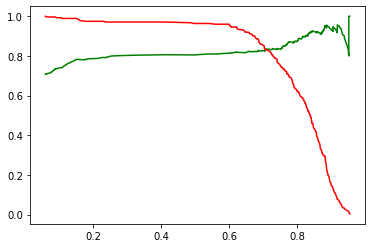

In [158]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [159]:
num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.transform(X_test[num_cols])

X_test.head()

<ipython-input-159-25036b74e056>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[num_cols] = scaler.transform(X_test[num_cols])
C:\Users\Gowtham krishnan\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
169,0.492851,0.726038,1.216660,-0.372463,0.947381,-0.816073,0.928515,0.271793,0.440386,1,0,0,1,0
546,0.492851,-1.377338,-0.772402,-0.372463,-0.454386,-0.816073,-0.895643,-4.947216,0.440386,0,1,0,1,0
373,0.492851,-1.377338,0.222129,-0.372463,-0.543771,0.330579,-0.424402,-2.627657,-2.270738,1,0,0,0,1
449,0.492851,-1.377338,0.222129,2.684834,-0.632249,0.073780,0.776502,0.271793,-2.270738,0,1,0,1,0
211,0.492851,0.726038,2.211191,-0.372463,-0.432644,-0.094727,-0.165980,0.271793,-2.270738,1,0,0,1,0


In [160]:
X_test=X_test[col]

In [161]:
X_test_sm = sm.add_constant(X_test)

In [162]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

169    0.907357
546    0.906962
373    0.144548
449    0.045638
211    0.281988
115    0.908980
254    0.073649
538    0.744577
281    0.894778
166    0.780066
dtype: float64

In [163]:
y_test_pred=y_test_pred.values.reshape(-1)

In [164]:
y_pred_final = pd.DataFrame({'Status':y_test.values,'Status_prob':y_test_pred})
y_pred_final['Prospect ID'] = y_test.index

In [165]:
y_pred_final.head()

,Status,Status_prob,Prospect ID
0,1,0.907357,169
1,0,0.906962,546
2,0,0.144548,373
3,0,0.045638,449
4,0,0.281988,211


In [168]:
y_pred_final['final_predicted'] = y_pred_final.Status_prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,Status,Status_prob,Prospect ID,final_predicted
0,1,0.907357,169,1
1,0,0.906962,546,1
2,0,0.144548,373,0
3,0,0.045638,449,0
4,0,0.281988,211,0


In [169]:
metrics.accuracy_score(y_pred_final.Status, y_pred_final.final_predicted)

0.8224852071005917

In [170]:
confusion2 = metrics.confusion_matrix(y_pred_final.Status, y_pred_final.final_predicted )
confusion2

array([[ 22,  27],
       [  3, 117]], dtype=int64)

In [171]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [172]:
TP / float(TP+FN)

0.975

In [173]:
TN / float(TN+FP)

0.4489795918367347

In [174]:
precision_score(y_pred_final.Status , y_pred_final.final_predicted)

0.8125

In [176]:
recall_score(y_pred_final.Status, y_pred_final.final_predicted)

0.975

### Test Data:

Accuracy: 82 %

Sensitivity:97 %

Specifity:44 %